<a href="https://colab.research.google.com/github/smathews88/machine_learning/blob/main/01_ml_linear_regression_predict_company_profit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **2. Load dataset and extract depentend and indepentend variables**

In [ ]:
ds_companies = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/1000_Companies.csv")
ds_companies.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
X = ds_companies[["R&D Spend","Administration","Marketing Spend","State"]]
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [ ]:
y = ds_companies["Profit"]
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

# **3. Data Visualization**

<Axes: >

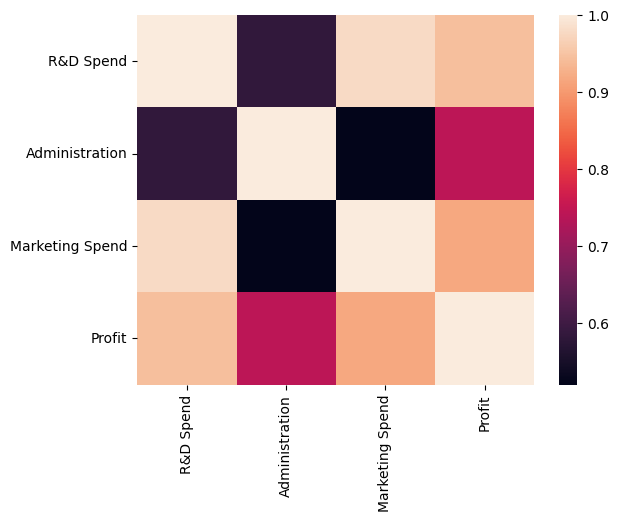

In [ ]:
sns.heatmap(ds_companies[["R&D Spend","Administration","Marketing Spend","Profit"]].corr())

# **4. Noramalization for Numerical data and One Hot Encoding for Categorical data**

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
ct = make_column_transformer (
    (MinMaxScaler(),['R&D Spend','Administration','Marketing Spend']),
    (OneHotEncoder(), ['State'])
)
encoding = ct.fit(X)
X = ct.transform(X)
print( X.shape, y.shape)
encoding

(1000, 6) (1000,)


ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['R&D Spend', 'Administration',
                                  'Marketing Spend']),
                                ('onehotencoder', OneHotEncoder(), ['State'])])

# **5. Divide dataset into Train, Test and Validation dataset**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 0)
X_val, X_test, y_val, y_test = train_test_split(X,y, test_size = 0.5, random_state = 0)
X_train.shape, X_test.shape, X_val.shape , y_train.shape, y_test.shape, y_val.shape

((600, 6), (500, 6), (500, 6), (600,), (500,), (500,))

# **6. Create Linear Model**

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

# **7. Train the model**

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

# **8. Evaluate the Validation data set**

In [ ]:
y_pred = model.predict(X_val)
y_pred

array([124426., 117438.,  56820., 125376.,  90156.,  71156., 180850.,
       185492.,  57280.,  90892., 101700., 123816.,  88290., 106004.,
       106158.,  74864.,  51378., 154456.,  88128., 141300., 141364.,
       168988., 112528., 149976., 211588., 172842., 127246., 182856.,
       133426., 101198., 143310., 158754., 182746.,  49572., 158000.,
       182432.,  79450.,  74572., 149106., 174564.,  60046.,  50836.,
       102576., 125204.,  53782., 163710., 126024., 167222.,  80572.,
       135222.,  96486., 163100.,  95194.,  79134., 101428., 119586.,
       170214., 146838.,  57356., 136410.,  67388., 105486.,  91954.,
       142758., 174578.,  62944.,  59270.,  79886., 101778., 162876.,
        79852.,  99234.,  54218., 176298., 153962.,  91084., 158362.,
        55190., 120068., 174644., 182272., 127286.,  72568.,  71936.,
        86570.,  88392.,  99932., 183294., 172034., 104850., 182176.,
       143018., 166818., 283678.,  79996., 115070., 165528.,  53178.,
        95016.,  647

In [ ]:
model.coef_

array([ 4.19756935e+04,  3.60376469e+05,  1.00495334e+05, -1.11616627e+16,
       -1.11616627e+16, -1.11616627e+16])

In [ ]:
model.intercept_

1.116166265126833e+16

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_val, y_pred)

0.95820281872102

# **8. Evaluate the Test data set**

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([ 89580.,  88208.,  94704., 175568.,  83146., 110420., 150614.,
        91268., 164672.,  52596.,  66642., 150348., 126860.,  58998.,
       177672.,  75016., 117894., 164676., 179978., 182218., 124494.,
        85440., 180902.,  83908., 104858., 101070.,  52788.,  56504.,
        68596., 224976., 120436., 111606., 101298., 137688.,  63650.,
       108726., 186180., 171312., 174526., 117314.,  96522., 165558.,
       107588.,  49554., 116152.,  58290., 158230.,  78020., 159548.,
       130838., 184806., 174492.,  93550.,  78054., 180888.,  83966.,
       142650., 170718.,  84104., 105134., 141404.,  52132., 141850.,
       139144.,  98118., 113214., 126670., 152158.,  58496., 174166.,
       124558., 169188.,  90812., 156210.,  84072.,  77588., 120068.,
        93156., 139014., 143618., 171016., 140082., 106200., 155706.,
       140002., 110020.,  69376.,  87902., 140132., 148486., 157964.,
        58190.,  93484., 112268.,  56178., 107250., 147120., 152166.,
       167896., 1186

In [ ]:
r2_score(y_test, y_pred)

0.9302376772666163